In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the VADER lexicon downloaded
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import os

# Change the working directory to C:\jupyter
os.chdir('C:\\jupyter')

# Verify the current working directory
print(os.getcwd())


C:\jupyter


In [3]:
# Load the datasets
file_path1 = r"C:\\jupyter\archive\twitter_training.csv"
file_path2 =r"C:\\jupyter\archive\twitter_validation.csv"

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

# Combine the datasets
data = pd.concat([data1, data2], ignore_index=True)

# Display the first few rows of the combined dataset
data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [4]:
# Inspect the columns to identify the correct column names
print(data.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [6]:
# Replace 'text' with the actual column name if different
text_column = 'Borderlands'  # Update with the correct column name if necessary

# Drop duplicates and missing values
data.drop_duplicates(subset=[text_column], inplace=True)
data.dropna(subset=[text_column], inplace=True)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    return text

# Apply text preprocessing
data['cleaned_text'] = data[text_column].apply(preprocess_text)

# Display the first few rows after preprocessing
data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",cleaned_text
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,borderlands
2285,1601.0,CallOfDutyBlackopsColdWar,Negative,nice . First round first nuke . . @charlieINT...,NaN,NaN,NaN,NaN,callofdutyblackopscoldwar
4661,1.0,Amazon,Negative,@amazon wtf .,NaN,NaN,NaN,NaN,amazon
6977,9201.0,Overwatch,Positive,Had a fun ti8me being trash buddies with @Fauw...,NaN,NaN,NaN,NaN,overwatch
9311,12801.0,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,NaN,NaN,NaN,NaN,xboxxseries


In [7]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
data['sentiment_score'] = data['cleaned_text'].apply(get_sentiment_scores)

# Classify sentiment based on score
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few rows with sentiment scores
data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",cleaned_text,sentiment_score,sentiment
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,borderlands,0.0000,neutral
2285,1601.0,CallOfDutyBlackopsColdWar,Negative,nice . First round first nuke . . @charlieINT...,NaN,NaN,NaN,NaN,callofdutyblackopscoldwar,0.0000,neutral
4661,1.0,Amazon,Negative,@amazon wtf .,NaN,NaN,NaN,NaN,amazon,0.1779,positive
6977,9201.0,Overwatch,Positive,Had a fun ti8me being trash buddies with @Fauw...,NaN,NaN,NaN,NaN,overwatch,0.0000,neutral
9311,12801.0,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,NaN,NaN,NaN,NaN,xboxxseries,0.0000,neutral


C:\Users\bhanu\AppData\Local\Temp\ipykernel_20348\3672965431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


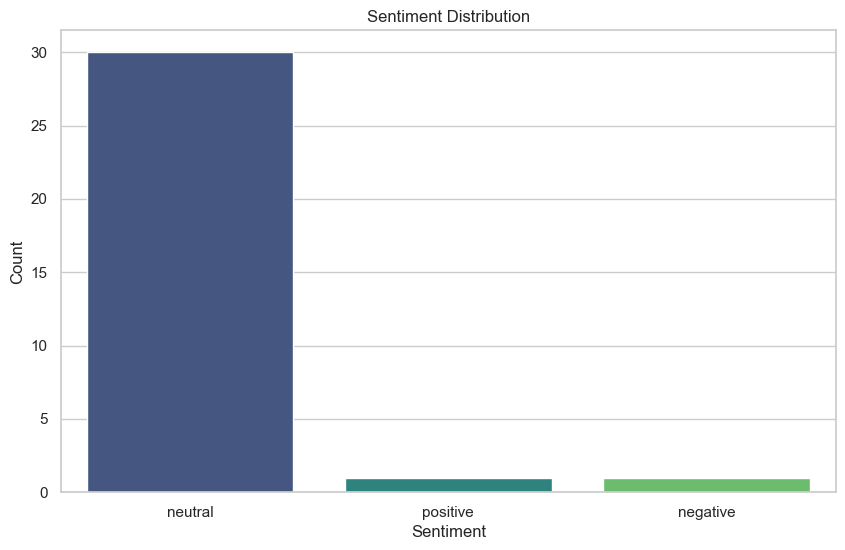

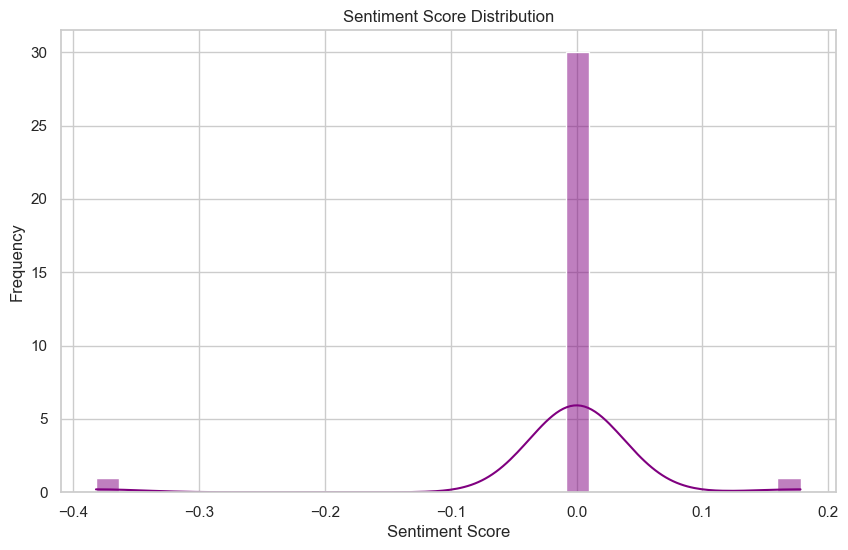

In [8]:
# Set plot style
sns.set(style='whitegrid')

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], kde=True, bins=30, color='purple')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Calculate mean sentiment score
mean_sentiment = data['sentiment_score'].mean()
print(f'Mean Sentiment Score: {mean_sentiment}')

# Calculate sentiment counts
sentiment_counts = data['sentiment'].value_counts()
print(f'Sentiment Counts:\n{sentiment_counts}')


Mean Sentiment Score: -0.006371874999999999
Sentiment Counts:
sentiment
neutral     30
positive     1
negative     1
Name: count, dtype: int64
